# Задание 2. Проведи разведочный анализ данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### План работы:
* **Собрать Pandas DataFrame и проверить, есть ли пропуски в данных**
* **Посчитать распределение целевой переменной в датасете**
* **С помощью стандартных библиотек Python (Matplotlib, seaborn) построить графики распределения заемщиков по**:

 * а) возрасту,
 * б) полу,
 * б) образованию,
 * в) семейному положению.
* **Ответить на вопросы, проанализировав результаты EDA**
 * а) Кого среди заемщиков больше: тех, у кого высока вероятность наступления дефолта в следующем месяце или тех, у кого такая вероятность равна нулю?
 * б) Каков средний возраст заемщиков?
 * в) Среди заемщиков преобладают мужчины или женщины?
 * г) Верна ли гипотеза о том, что люди с высшим образованием склонны чаще брать кредиты?
 * д) Различается ли распределение возрастов для мужчин и женщин в выборке?

**Дополнительные сведения:**  В таблице содержится информация о сумме предоставленного кредита (*LIMIT_BAL*) и возрасте заемщика (*AGE*), о его поле (*SEX*: 1 = мужской; 2 = женский), образовании (*EDUCATION*: 1 = аспирантура, 2 = университет, 3 = средняя школа, 4 = другое, 5 = нет образования, 6 = не хочу отвечать) и семейном положении (*MARRIAGE*: 1 = женат, 2 = холост, 3 = другое)

In [2]:
# полностью выводить DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

**Собираем Pandas DataFrame и проверяем, есть ли пропуски в данных**

In [3]:
df = pd.read_csv('default_of_credit_card_clients.xlsx - Data.csv')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


*Т.к. первая строка - строка с названиями столбцов, то вынесем ее в название, а саму строку очистим*

In [4]:
df.columns = df.iloc[0]
df = df.drop(labels=0, axis=0)
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1


*Заменим назание целевой колонки для удобства доступа*

In [5]:
df = df.rename({'default payment next month': 'default_payment_next_month'}, axis=1)

*Вывод информации о датасете*

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

*Т.к. все столбцы выглядят как числа, но являются object, то преобразуем их к числам быстрым преобразованием pd.to_numeric()*

In [7]:
df = df.apply(pd.to_numeric, errors='coerce', axis=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [9]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


*Из describe сразу можно ответить на вопрос (б) про средний возраст. Он равен 35.5 лет*

*Поиск пропущенных объектов*

In [10]:
df.isnull().sum()

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

In [11]:
df['SEX'].unique()

array([2, 1], dtype=int64)

In [12]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [13]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

*На первый взгляд пропущенных значений нет. Но если детальнее рассмотреть категориальные признаки (пол, образование, семейное положение, то обнаруживается аномалия (0), которая не описанная в данных. Вероятнее всего при заполнении пропусков использовался "0". Посмотрим сколько таких значений*

In [14]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [15]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

*Т.е. в данных пропущено 54 значений семейного положения и 14 значений образования*

**Посчитаем распределение целевой переменной в датасете**

In [16]:
df.default_payment_next_month.value_counts()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

*Число заемщиков, которые смогут заплатить в следующем месяце оказалось значительно больше (23364) чем тех, кто не сможет заплатить (6636) - это ответ на вопрос (а). Построим гистограмму и круговую диаграмму для наглядности*

<AxesSubplot:xlabel='default_payment_next_month', ylabel='Count'>

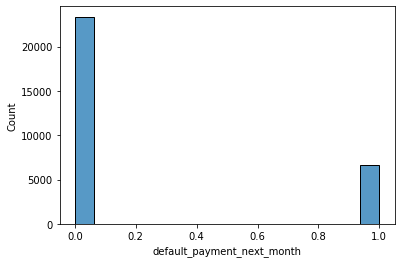

In [17]:
sns.histplot(data=df.default_payment_next_month)

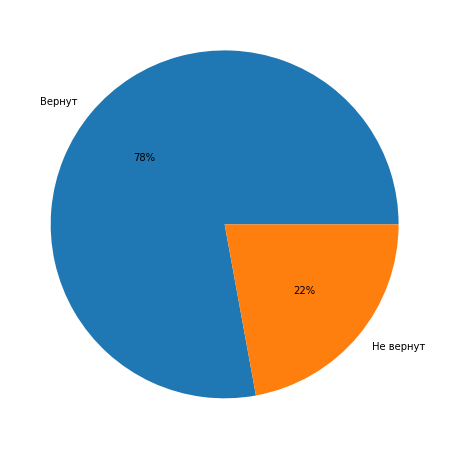

In [18]:
data = [df.default_payment_next_month.value_counts()[0], df.default_payment_next_month.value_counts()[1]]
labels = ['Вернут', 'Не вернут']
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, autopct='%.0f%%')
plt.show()

**С помощью стандартных библиотек Python (Matplotlib, seaborn) построим графики распределения заемщиков по**:
 * а) возрасту,
 * б) полу,
 * б) образованию,
 * в) семейному положению.

*а) графики распределения заемщиков по возрасту*

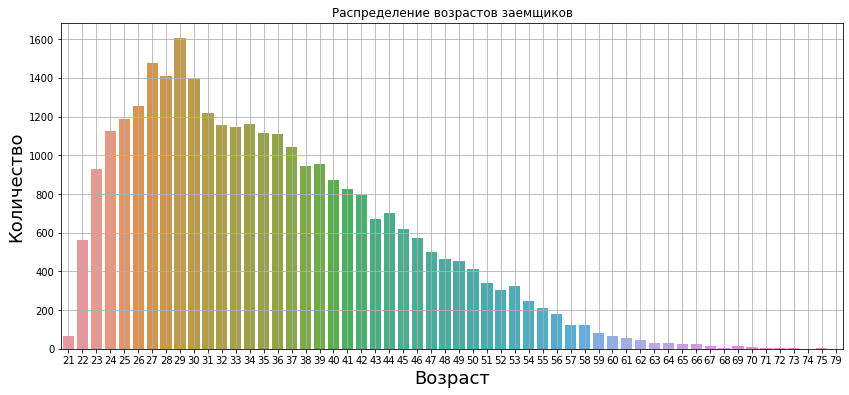

In [19]:
ax1 = plt.figure(figsize=(14, 6))
ax1 = sns.countplot(x=df['AGE'])
ax1.set_xlabel('Возраст', fontsize=18) 
ax1.set_ylabel('Количество', fontsize=18)
ax1.set_title('Распределение возрастов заемщиков')
plt.grid()
plt.show()

In [20]:
df.AGE.mean()

35.4855

*б) графики распределения заемщиков по полу*

<AxesSubplot:xlabel='SEX', ylabel='Count'>

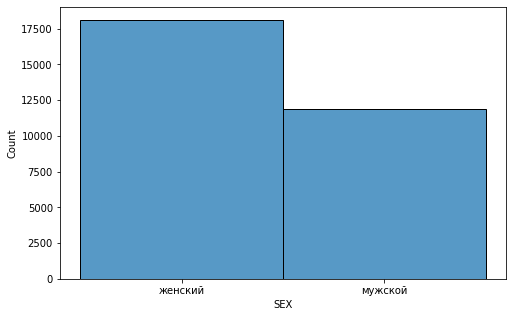

In [21]:
plt.figure(figsize=(8, 5))
df_sex = df['SEX'].replace({1: 'мужской', 2: 'женский'})
sns.histplot(data=df_sex)

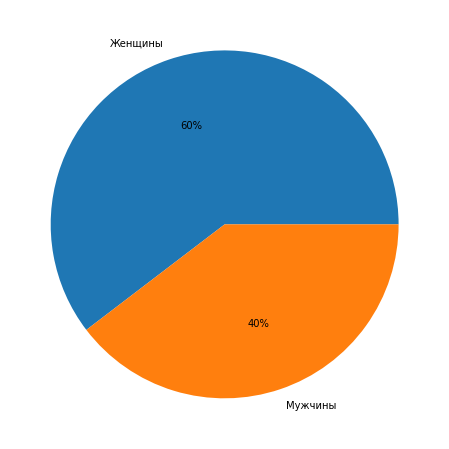

In [22]:
data = [df_sex.value_counts()[0], df_sex.value_counts()[1]]
labels = ['Женщины', 'Мужчины']
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, autopct='%.0f%%')
plt.show()

In [23]:
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

*Из графика видим, что количество мужчин (11888) меньше количества женщин (18112). Это ответ на вопрос (в)*


*в) графики распределения заемщиков по образованию*

<AxesSubplot:xlabel='EDUCATION', ylabel='Count'>

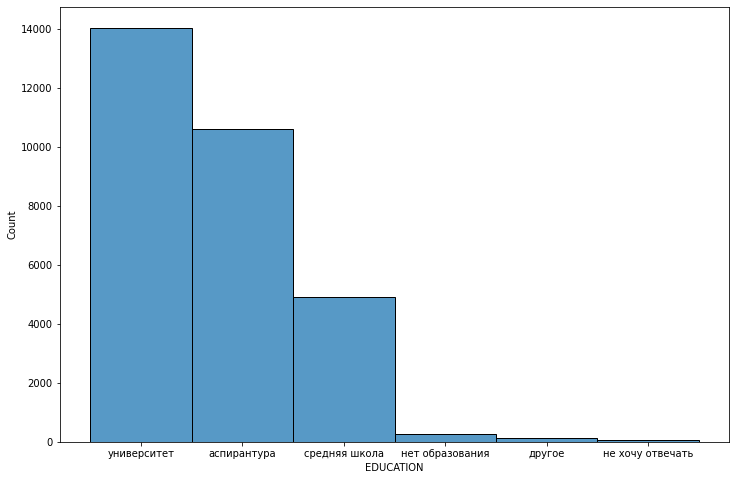

In [24]:
plt.figure(figsize=(12, 8))
df_education = df['EDUCATION'].replace({1: 'аспирантура', 
                                        2: 'университет',
                                        3: 'средняя школа',
                                        4: 'другое',
                                        5: 'нет образования',
                                        6: 'не хочу отвечать',
                                        0: None})
sns.histplot(data=df_education)

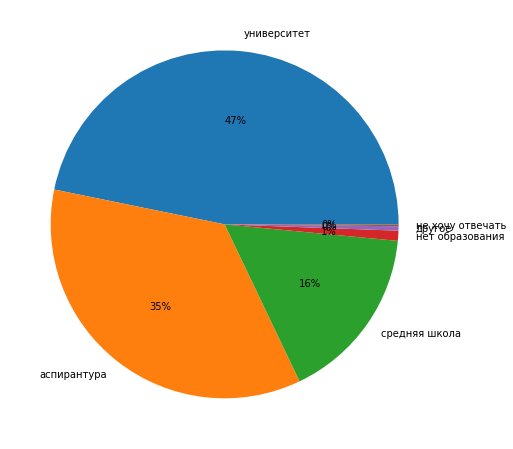

In [25]:
data = df_education.value_counts()
labels = df_education.unique()[:-1]
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, autopct='%.0f%%')
plt.show()

*Из данного графика следует, что люди с высшим образованием (университет/аспирантура) чаще берут кредиты. Значит, гипотеза верна и это ответ на вопрос (г)*

*г) графики распределения заемщиков по семейному положению*

<AxesSubplot:xlabel='MARRIAGE', ylabel='Count'>

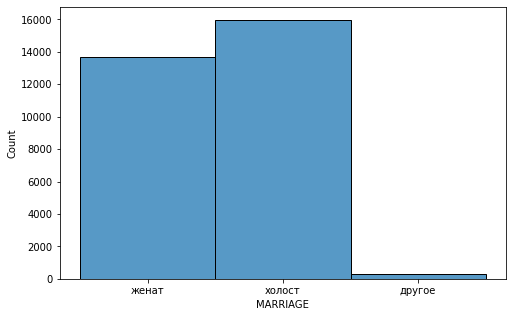

In [26]:
plt.figure(figsize=(8, 5))
df_marriage = df['MARRIAGE'].replace({1: 'женат', 
                                      2: 'холост', 
                                      3: 'другое', 
                                      0: None})
sns.histplot(data=df_marriage)

**Для ответов на вопрос "Различается ли распределение возрастов для мужчин и женщин в выборке?" нужно еще немного проанализировать данные**

In [27]:
x = df.query("SEX == 2")['AGE']
y = df.query("SEX == 1")['AGE']

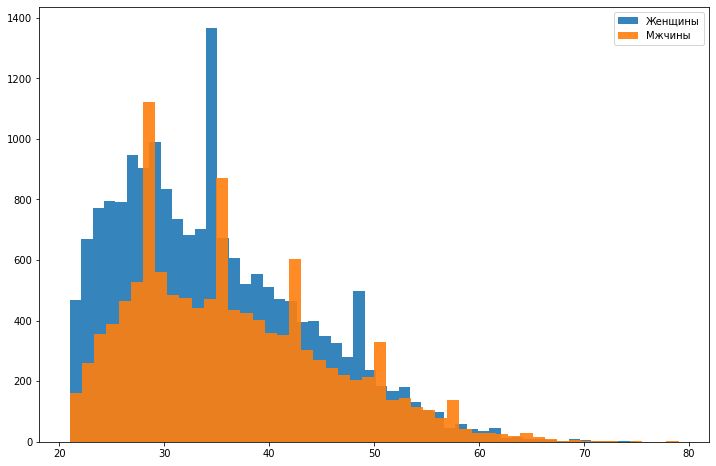

In [28]:
plt.figure(figsize=(12, 8))
plt.hist(x, bins=50, alpha=0.9, label='Женщины')
plt.hist(y, bins=50, alpha=0.9, label='Мжчины')
plt.legend(loc='upper right')
plt.show()

*Проанализировав график, делаем вывод, что распределение возрастов мужчин и женщин практически не различается. Это ответ на вопрос (д)*



# Выводы:

а) Кого среди заемщиков больше: тех, у кого высока вероятность наступления дефолта в следующем месяце или тех, у кого такая вероятность равна нулю? *Ответ*: 
 * **Тех, у кого вероятность дефолта равна нулю, больше в выборке (78% против 22%)**
 
 
б) Каков средний возраст заемщиков? *Ответ*:
 * **Средний возраст заемщиков 35.5 лет**
 
 
в) Среди заемщиков преобладают мужчины или женщины? *Ответ*:
* **Среди заемщиков преобладают женщины (60% против 40%)**


г) Верна ли гипотеза о том, что люди с высшим образованием склонны чаще брать кредиты? *Ответ*:
* **Гипотеза о том, что люди с высшим образованием склонны чаще брать кредиты верна(47% - университет, 35% - аспирантура. Итого, 82% против 18% - остальное)**


д) Различается ли распределение возрастов для мужчин и женщин в выборке? *Ответ*: 
* **Распределение возрастов мужчин и женщин практически не различается**

